<a href="https://www.kaggle.com/code/vishwas277/multi-class-classification-using-mlp-on-mnist?scriptVersionId=134230801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# MultiClass Classification using Multi-Layer Perceptron

MNIST DATSET - 10 classes output (0-10)

## Import Libraries

In [1]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

- mnist.load_data() 
- Returns tuple of NumPy arrays: 
     - (x_train, y_train), (x_test, y_test).

## Importing Dataset

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Since it is an Image dataset its 3 Dimensional
* 60000 images with 28*28 dimensions - x_train

In [4]:
# Lets view on a Single Image

x_train[0] # Has 28 rows and columns

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Display the Image

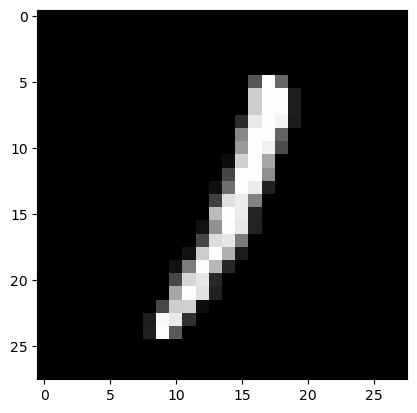

In [5]:
plt.imshow(x_train[99],cmap='gray')
plt.show()

## Scale the Data

In [6]:
# Scaliing the Data

x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train[0]   # values are between 0-1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

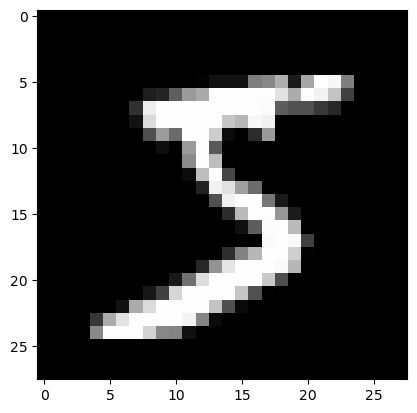

In [8]:
plt.imshow(x_train[0],cmap='gray')
plt.show()  # No effect on images

In [9]:
x_train.shape  # Have to bring 3d to 2d
# Flatten 28 * 28 = 784

(60000, 28, 28)

## Model Building

In [10]:
from tensorflow.keras.layers import Dense,Flatten

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))  #784
model.add(Dense(128,activation='relu'))  # 128 pixels
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


28 * 28 = 784

784 * 128 = 100352 

Add the Bias for each node

100352 + 128 = 100480

128 * 10 = 1280

Add Bias 

1280 + 128 = 1290

In [12]:
784*128

100352

In [13]:
100352 + 128

100480

## Compile 

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist = model.fit(x_train,y_train,epochs=10,validation_split=0.2) #eventhough 10 epochs there are more trainable parameters...it'll take time

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2876 - accuracy: 0.9180 - val_loss: 0.1581 - val_accuracy: 0.9558
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1305 - accuracy: 0.9619 - val_loss: 0.1156 - val_accuracy: 0.9656
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9741 - val_loss: 0.1043 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9795 - val_loss: 0.0990 - val_accuracy: 0.9718
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0952 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0953 - val_accuracy: 0.9736
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0876 - val_accuracy:

In [15]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [16]:
y_pred

array([[1.50283397e-09, 2.18041522e-11, 2.15578169e-07, ...,
        9.99995172e-01, 1.93132041e-06, 6.53826248e-07],
       [1.15415644e-09, 9.12325788e-07, 9.99998868e-01, ...,
        2.12538436e-19, 7.08243206e-08, 9.20971512e-16],
       [6.31904925e-07, 9.99519169e-01, 4.12367699e-05, ...,
        7.82743882e-05, 3.39008926e-04, 1.43565046e-07],
       ...,
       [4.80980290e-15, 5.37703291e-15, 4.70874979e-17, ...,
        9.10406683e-08, 2.47426399e-08, 1.09802395e-05],
       [7.69024601e-14, 4.84824125e-15, 5.31989885e-15, ...,
        4.58627819e-14, 9.16705801e-07, 6.07586305e-15],
       [1.19615012e-10, 3.12428333e-13, 6.79917320e-12, ...,
        8.57909545e-18, 7.04104787e-12, 2.11125185e-13]], dtype=float32)

In [17]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

## Evaluating the Model

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9793

## HyperParameter Tuning
- Hidden Layer Activation Function
- Increase No of Epochs
- Increase number of Nodes
- Increase the Hidden Layers

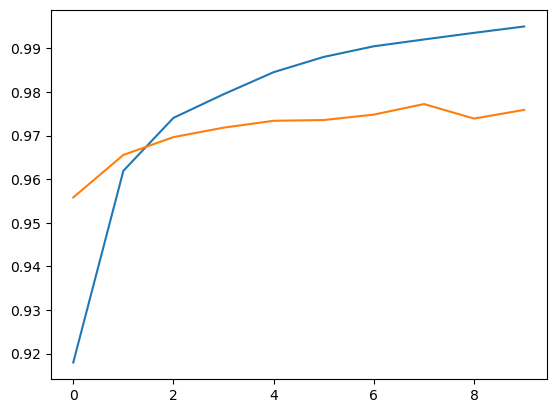

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])\

plt.show()

**This is the Case of Overfitting**

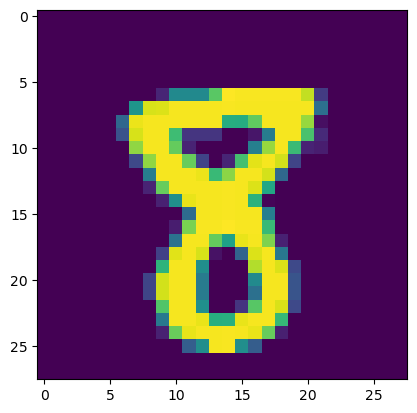

In [20]:
# Display the sixth image

plt.imshow(x_test[128])
plt.show()

## Model Prediction

In [21]:
model.predict(x_test[5].reshape(1,28,28))

1/1 [==============================] - 0s 22ms/step


array([[7.6094615e-09, 9.9981588e-01, 2.0344417e-07, 5.8126641e-08,
        3.3350224e-07, 3.2811827e-09, 4.4720325e-09, 1.6306039e-04,
        2.0382811e-05, 3.0826561e-09]], dtype=float32)

In [22]:
# Find the highest probability
model.predict(x_test[128].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([8])

It results as array[1] Predicting as 1